In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.data.shape

(70000, 784)

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

In [3]:
data,target = fetch_openml('mnist_784', version=1, cache=True, return_X_y = True)
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
data.shape

(70000, 784)

In [5]:
target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
target.shape

(70000,)

In [7]:
data[0].reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

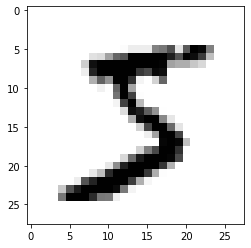

In [8]:
plt.imshow(data[0].reshape(28,28), cmap='gray_r')

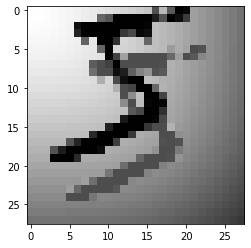

In [9]:
def add_shadow(data):
    data = data.reshape(28,28)
    for i in range(28):
        for j in range(28):
                if data[i,j] < 150:
                    if int((i**3+j**3)**(1/2)) <= 253:
                        data[i,j] = int((i**3+j**3)**(1/2))
                    else :
                        data[i,j] = 253
                else :
                    data[i-5,j-2] = data[i,j]
                    data[i,j] = data[i,j]-75
    data = data.flatten()
    return data
plt.imshow(add_shadow(data[0]).reshape(28,28), cmap='gray_r')

In [10]:
# fit original data
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(data,target,random_state=0)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain,ytrain)
#print(Xtest.shape)
ypred = model.predict(Xtest)
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1718
           1       0.99      0.99      0.99      1974
           2       0.98      0.96      0.97      1822
           3       0.95      0.97      0.96      1729
           4       0.97      0.97      0.97      1675
           5       0.96      0.97      0.97      1582
           6       0.98      0.97      0.98      1723
           7       0.96      0.97      0.97      1818
           8       0.96      0.96      0.96      1720
           9       0.95      0.95      0.95      1739

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



Text(91.68, 0.5, 'predicted label')

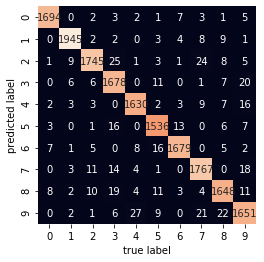

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [12]:
# fit new data
for i in range(17500):
    Xtest[i] = add_shadow(Xtest[i])
ypred_S = model.predict(Xtest)
print(metrics.classification_report(ypred_S,ytest))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.33      0.01        15
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.88      0.10      0.18     14112
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.31      0.16      0.21      3372
           9       0.00      0.00      0.00         0

    accuracy                           0.11     17500
   macro avg       0.12      0.06      0.04     17500
weighted avg       0.77      0.11      0.19     17500



Text(91.68, 0.5, 'predicted label')

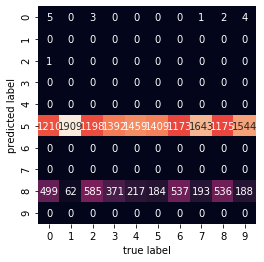

In [13]:
mat_S = confusion_matrix(ytest,ypred_S)
sns.heatmap(mat_S.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

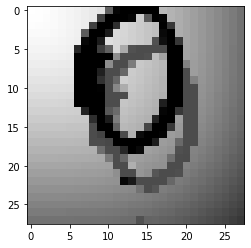

In [14]:
plt.imshow(Xtest[0].reshape(28,28), cmap='gray_r')

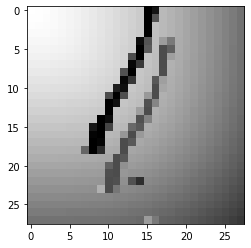

In [15]:
plt.imshow(Xtest[8].reshape(28,28), cmap='gray_r')

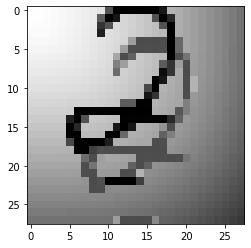

In [16]:
plt.imshow(Xtest[3].reshape(28,28), cmap='gray_r')

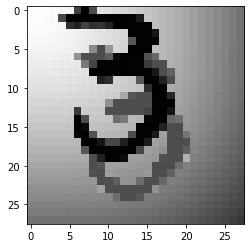

In [17]:
plt.imshow(Xtest[11].reshape(28,28), cmap='gray_r')

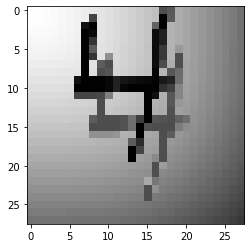

In [18]:
plt.imshow(Xtest[1].reshape(28,28), cmap='gray_r')

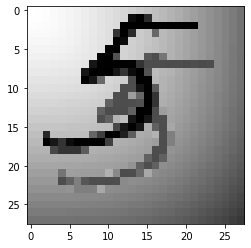

In [19]:
plt.imshow(Xtest[22].reshape(28,28), cmap='gray_r')

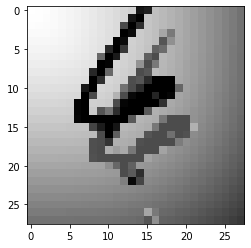

In [20]:
plt.imshow(Xtest[16].reshape(28,28), cmap='gray_r')

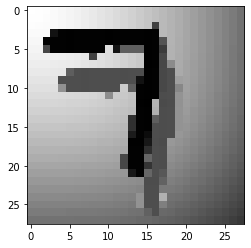

In [21]:
plt.imshow(Xtest[6].reshape(28,28), cmap='gray_r')

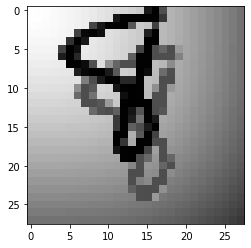

In [22]:
plt.imshow(Xtest[40].reshape(28,28), cmap='gray_r')

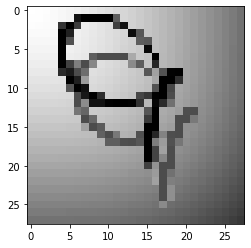

In [23]:
plt.imshow(Xtest[5].reshape(28,28), cmap='gray_r')